# Donor Churn Prediction Project

hi, 
### Objective
The purpose of this project is to enhance donor retention strategies by analyzing donor behavior and predicting churn. By identifying at-risk donors early, we aim to:
1. Improve the efficiency of donor engagement campaigns.
2. Provide actionable insights to drive targeted outreach efforts.
3. Maximize fundraising revenue by retaining high-value donors.

### Business Context
- **Donor Retention**: Retaining existing donors is far more cost-effective than acquiring new ones. Insights from this project will support decision-making for donor relationship managers.
- **Scalable Strategies**: The models developed here can be applied across campaigns, enabling broader insights for future fundraising efforts.
- **Data Sources**:
  - **Donor Data**: Includes demographics, donation history, and attributes like alumni status.
  - **Contact Reports**: Captures interaction details (e.g., phone calls, emails) with donors.

### code outline:
- Library Imports
- Data Loading
- Data Exploration
- Data Cleaning
- Feature Engineering
- Exploratory Data Analysis (EDA)
- Model Building


In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [84]:
# Load datasets
donor_data = pd.read_csv("/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/data_science_for_fundraising_donor_data.csv")
contact_reports = pd.read_csv("/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/data_science_for_fundraising_contact_reports.csv")

# Display first few rows of each dataset
print("Donor Data:")
display(donor_data.head())

print("\nContact Reports:")
display(contact_reports.head())


Donor Data:


,ID,ZIPCODE,AGE,MARITAL_STATUS,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,WEALTH_RATING,...,CON_YEARS,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,DONOR_IND,BIRTH_DATE
0,1,23187.0,NaN,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,Y,NaN
1,2,77643.0,33.0,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,Y,1984-06-16
2,3,NaN,NaN,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,Y,NaN
3,4,47141.0,31.0,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,N,1986-12-03
4,5,92555.0,68.0,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,Y,1949-09-11



Contact Reports:


,Staff Name,Method,Date,Summary,Substantive,Donor,Outcome
0,Ann Marie Levier,Email,12/1/17,Sent Dominic an email asking for an update if ...,Y,Dominic Richards,Positive
1,Ann Marie Levier,Email,12/1/17,"Emailed Dr. Jonathan Winters, who have ties to...",Y,William Bendrich,Positive
2,Ann Marie Levier,Letter,11/30/17,"Sent Belinda an upgrade brochure, appeal lette...",Y,Belinda Carlyle,Positive
3,Deborah Mettier,Phone,11/29/17,$50k to extend Kendrick Memorial Undergraduate...,Y,Donna Gilbert,Positive
4,Ann Marie Levier,Letter,11/27/17,Sent upgrade brochure asking Jeffrey and Julie...,Y,Jeffrey Jantz,Positive


### Explanation: What We Just Did
We loaded two datasets: Donor Data and Contact Reports. Let me walk you through what’s inside these tables, why they matter, and how we’re going to use them in this project. 

*Donor Data*
This table is like a profile sheet for all the donors. Each row represents a single donor and contains details about them. Here's what some of the key columns mean:

**ID**: A unique identifier for each donor (PK).

**ZIPCODE**: The area they live in. Useful for geographic analysis or targeting campaigns.

**AGE**: How old the donor is. Age can help us understand which groups donate more or less.

**MARITAL_STATUS**, GENDER: Personal details that might influence donor behavior.

**ALUMNUS_IND**, **PARENT_IND**: Indicators that tell us if they are alumni or parents of current students. Alumni often donate more because of their connection to the university.

**WEALTH_RATING**: A rating of their financial standing. Higher wealth might mean a higher likelihood of donating more.

**PrevFYGiving**, **CurrFYGiving**, **TotalGiving**: These columns show their donation history—how much they gave in the past, in the current fiscal year, and in total.

**DONOR_IND**: A yes/no column that tells us if the person is an active donor.

### What’s Missing or Needs Attention:
Some columns have missing values (such AGE, WEALTH_RATING). We’ll need to clean this data to make it useful for analysis.
Monetary amounts are in strings. We’ll convert these to numbers for calculations.

*Contact Reports*
This table tracks interactions with donors. Think of it as a logbook of who contacted them, how, and the result of the interaction.

**StaffName**: The name of the staff member who contacted the donor.

**Method**: How the donor was contacted (e.g., Email, Phone, Letter). This is important for analyzing which communication methods work best.

**Date**: When the interaction took place. This helps us track recency.

**Summary**: A brief description of what happened during the interaction.

**Donor**: The name of the donor being contacted. This will eventually be linked to the Donor Data table.

**Outcome**: The result of the interaction (e.g., Positive). This tells us whether the interaction was successful.

### What’s Missing or Needs Attention:

the purpose is to build a good prediction model that aligns with a potential use case for real world orgqnization , so it’s critical to determine the most realistic approach for handling your data.

Since the datasets don’t naturally have a common column, **creating a simulated relationship** will allow us to:

- Build a unified dataset for analysis and modeling.
- Create a practical project that demonstrates predictive modeling skills.
- Make the project realistic for a university or  setting (e.g: predicting donor behavior based on interactions and demographics).

I believe in real_world datasets  the 2 tables are lilkey joinable and could be more insightful in that way , i didn't have access to real data, so to fix it **The DonorID column in the Contact Reports dataset was simulated for this project** to create a unified dataset and demonstrate predictive modeling skills. 






In [85]:
# Inspect Donor Data
print("Donor Data Info:")
donor_data.info()

# Inspect Contact Reports Data
print("\nContact Reports Info:")
contact_reports.info()

# Check for missing values
print("\nMissing Values in Donor Data:")
print(donor_data.isnull().sum())

print("\nMissing Values in Contact Reports:")
print(contact_reports.isnull().sum())


Donor Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   34508 non-null  int64  
 1   ZIPCODE              34417 non-null  float64
 2   AGE                  13318 non-null  float64
 3   MARITAL_STATUS       9940 non-null   object 
 4   GENDER               34015 non-null  object 
 5   MEMBERSHIP_IND       34508 non-null  object 
 6   ALUMNUS_IND          34508 non-null  object 
 7   PARENT_IND           34508 non-null  object 
 8   HAS_INVOLVEMENT_IND  34508 non-null  object 
 9   WEALTH_RATING        2709 non-null   object 
 10  DEGREE_LEVEL         7606 non-null   object 
 11  PREF_ADDRESS_TYPE    30465 non-null  object 
 12  EMAIL_PRESENT_IND    34508 non-null  object 
 13  CON_YEARS            34508 non-null  int64  
 14  PrevFYGiving         34508 non-null  object 
 15  PrevFY1Giving      

## Data Cleaning/Preprocessing:

###  Observations on  donor data file:
#### Missing Data:

Columns like AGE and MARITAL_STATUS have many missing values (21,190 and 24,568 missing rows, respectively).
WEALTH_RATING and DEGREE_LEVEL have most of their values missing, which makes them less reliable for analysis(so we'll exclude them from the analysis)

#### Monetary Columns:

Columns like PrevFYGiving, PrevFY1Giving, and CurrFYGiving are stored as object, not numeric. This means we’ll need to clean and convert them for analysis.
Consistently Populated Columns:
Columns like ID, CON_YEARS, MEMBERSHIP_IND, ALUMNUS_IND, and TotalGiving have no missing values, making them reliable for use.

### Observations on Contact Reports:
Small Dataset:
With only 196 rows, this dataset provides insights into donor interactions but might not have a significant statistical impact for predictive modeling.
Important Features:
Columns like Method (e.g., Email, Phone) and Outcome (e.g., Positive) can provide insights into the effectiveness of communication strategies.
also we can do NLP analysis for the summary column.
Donor column will be crucial for linking to the Donor Data, but it currently lacks a common identifier like DonorID.


In [86]:
#data cleaning
# Drop columns with too many missing values
columns_to_drop = ['WEALTH_RATING', 'DEGREE_LEVEL']
donor_data = donor_data.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if columns don't exist

# Fill missing values
donor_data['AGE'] = donor_data['AGE'].fillna(donor_data['AGE'].median())  # Fill missing age with the median
donor_data['MARITAL_STATUS'] = donor_data['MARITAL_STATUS'].fillna('Unknown')  # Fill marital status with 'Unknown'

# Clean monetary columns
monetary_cols = ['PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving', 'CurrFYGiving']
for col in monetary_cols:
    if col in donor_data.columns:  # Check if the column exists
        donor_data[col] = donor_data[col].replace('[\$,]', '', regex=True).astype(float)  # Remove $ and convert to float
    else:
        print(f"Warning: Column {col} not found in the dataset.")

#some more fillings based on observation
# Fill ZIPCODE with the most frequent value
most_frequent_zip = donor_data['ZIPCODE'].mode()[0]
donor_data['ZIPCODE'] = donor_data['ZIPCODE'].fillna(most_frequent_zip)

# Fill GENDER with "Unknown"
donor_data['GENDER'] = donor_data['GENDER'].fillna('Unknown')

# Fill PREF_ADDRESS_TYPE with "Unknown"
donor_data['PREF_ADDRESS_TYPE'] = donor_data['PREF_ADDRESS_TYPE'].fillna('Unknown')



# Confirm changes
print("Updated Donor Data Information:")
print(donor_data.info())
print(donor_data.isna().sum())


Updated Donor Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   34508 non-null  int64  
 1   ZIPCODE              34508 non-null  float64
 2   AGE                  34508 non-null  float64
 3   MARITAL_STATUS       34508 non-null  object 
 4   GENDER               34508 non-null  object 
 5   MEMBERSHIP_IND       34508 non-null  object 
 6   ALUMNUS_IND          34508 non-null  object 
 7   PARENT_IND           34508 non-null  object 
 8   HAS_INVOLVEMENT_IND  34508 non-null  object 
 9   PREF_ADDRESS_TYPE    34508 non-null  object 
 10  EMAIL_PRESENT_IND    34508 non-null  object 
 11  CON_YEARS            34508 non-null  int64  
 12  PrevFYGiving         34508 non-null  float64
 13  PrevFY1Giving        34508 non-null  float64
 14  PrevFY2Giving        34508 non-null  float64
 15  Prev

<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/3084678493.py:14: SyntaxWarning: invalid escape sequence '\$'
  donor_data[col] = donor_data[col].replace('[\$,]', '', regex=True).astype(float)  # Remove $ and convert to float


### Feature Engineering
To prepare the dataset for predictive modeling, we’ll create key features to enhance our analysis.

Key Features to Create:

**Recency**:

Time since the last contribution. Calculate this using CON_YEARS and the current year (2024).

**Frequency**:

Total number of years with contributions (PrevFYGiving to PrevFY4Giving).

**Monetary Value**:

Sum of all previous contributions.

**Engagement Metrics**:

Use categorical columns like MEMBERSHIP_IND, ALUMNUS_IND, and HAS_INVOLVEMENT_IND to derive an Engagement Score.

In [87]:
# Calculate Recency (Time since last contribution)
donor_data['Recency'] = 2024 - donor_data['CON_YEARS']

# Calculate Frequency (Number of years with contributions)
donor_data['Frequency'] = donor_data[['PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving']].gt(0).sum(axis=1)

# Calculate Monetary Value (Total contribution amount)
donor_data['Monetary'] = donor_data[['PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving']].sum(axis=1)

# Create Engagement Score (binary sum of involvement indicators)
engagement_cols = ['MEMBERSHIP_IND', 'ALUMNUS_IND', 'PARENT_IND', 'HAS_INVOLVEMENT_IND']
donor_data['Engagement_Score'] = donor_data[engagement_cols].apply(lambda x: sum(x == 'Y'), axis=1)

# Confirm the new features
#print(donor_data[['Recency', 'Frequency', 'Monetary', 'Engagement_Score']].tail())


before continue with EDA for pupose of this project i want to  **link the datasets by simulating a common column** before proceeding with advanced feature engineering or correlation analysis.  

Why Link the Datasets First?

I believe in real_world datasets the 2 tables are lilkey joinable and could be more insightful in that way , i didn't have access to real data, so to fix it The DonorID column in the Contact Reports dataset was simulated for this project to create a unified dataset and demonstrate predictive modeling skills.

*Combining Insights*:

The Donor Data provides demographic and donation information.
The Contact Reports provide insights into donor interactions (e.g. method, outcome, summary).
By linking them, you can analyze how interactions (e.g., emails or calls) affect donor behavior, such as retention or monetary contributions.

*Feature Enrichment*:

Combined data allows us to create new features, like the frequency of interactions or outcomes from communications, and relate them to donation patterns.

*Prevents Inconsistencies*:

If I perform separate analyses on unlinked datasets, it can lead to inconsistencies or incomplete insights.


In [88]:
import random

# Simulate DonorID in Contact Reports
if len(contact_reports) <= len(donor_data):
    contact_reports['DonorID'] = random.sample(list(donor_data['ID']), k=len(contact_reports))
else:
    contact_reports['DonorID'] = random.choices(list(donor_data['ID']), k=len(contact_reports))

# Rename 'ID' to 'DonorID' in Donor Data for merging
donor_data.rename(columns={'ID': 'DonorID'}, inplace=True)

# Ensure consistent data types for merging
donor_data['DonorID'] = donor_data['DonorID'].astype(int)
contact_reports['DonorID'] = contact_reports['DonorID'].astype(int)


# Merge the datasets on DonorID
combined_data = pd.merge(donor_data, contact_reports, on='DonorID', how='left')

# Confirm the merged dataset
print("Combined Data Info:")
print(combined_data.info())

print(combined_data.isna().sum())

# Preview the merged dataset
print(combined_data.head(10))

# condirm data rows :34312+196= 34508

# Count linked and unlinked rows
linked_rows = combined_data['Method'].notnull().sum()
unlinked_rows = combined_data['Method'].isnull().sum()

print(f"Linked Rows: {linked_rows}")
print(f"Unlinked Rows: {unlinked_rows}")

# Fill missing values in interaction columns
interaction_cols = ['Method', 'Outcome', 'Summary']
for col in interaction_cols:
    combined_data[col] = combined_data[col].fillna('Unknown')

# Confirm changes
print(combined_data[interaction_cols].isnull().sum())

combined_data.to_csv('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/combined_donor_contact_data.csv', index=False)




Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DonorID              34508 non-null  int64  
 1   ZIPCODE              34508 non-null  float64
 2   AGE                  34508 non-null  float64
 3   MARITAL_STATUS       34508 non-null  object 
 4   GENDER               34508 non-null  object 
 5   MEMBERSHIP_IND       34508 non-null  object 
 6   ALUMNUS_IND          34508 non-null  object 
 7   PARENT_IND           34508 non-null  object 
 8   HAS_INVOLVEMENT_IND  34508 non-null  object 
 9   PREF_ADDRESS_TYPE    34508 non-null  object 
 10  EMAIL_PRESENT_IND    34508 non-null  object 
 11  CON_YEARS            34508 non-null  int64  
 12  PrevFYGiving         34508 non-null  float64
 13  PrevFY1Giving        34508 non-null  float64
 14  PrevFY2Giving        34508 non-null  float64
 15  PrevFY3Giving   

In [89]:
# EDA 
# Descriptive statistics for numerical columns
print(combined_data.describe())

# Categorical column summaries
categorical_columns = ['MARITAL_STATUS', 'GENDER', 'PREF_ADDRESS_TYPE', 'Method', 'Outcome']
for col in categorical_columns:
    print(f"Value counts for {col}:\n{combined_data[col].value_counts()}\n")



            DonorID       ZIPCODE           AGE     CON_YEARS  PrevFYGiving  \
count  34508.000000  34508.000000  34508.000000  34508.000000  3.450800e+04   
mean   17254.500000  56251.558943     43.366987      1.137475  3.776168e+02   
std     9961.745881  29978.229290     11.405722      2.423034  5.404837e+04   
min        1.000000    211.000000      1.000000      0.000000  0.000000e+00   
25%     8627.750000  30022.000000     42.000000      0.000000  0.000000e+00   
50%    17254.500000  58273.000000     42.000000      0.000000  0.000000e+00   
75%    25881.250000  90265.000000     42.000000      1.000000  0.000000e+00   
max    34508.000000  99928.000000    110.000000     36.000000  1.000000e+07   

       PrevFY1Giving  PrevFY2Giving  PrevFY3Giving  PrevFY4Giving  \
count   3.450800e+04   34508.000000   34508.000000   3.450800e+04   
mean    9.620105e+01      63.754926      57.118813   1.266312e+02   
std     1.045471e+04    3282.195711    2594.556590   1.006439e+04   
min     0.00

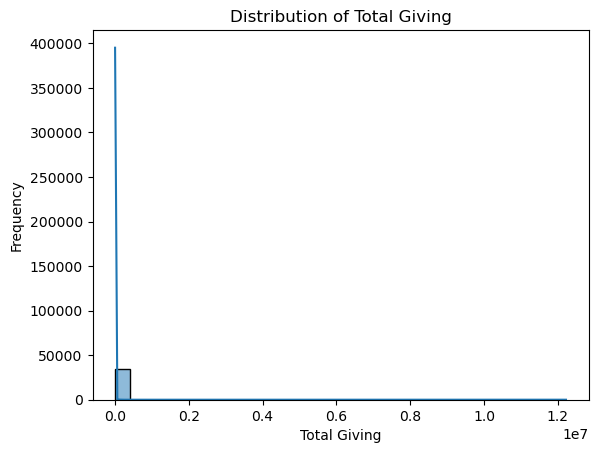

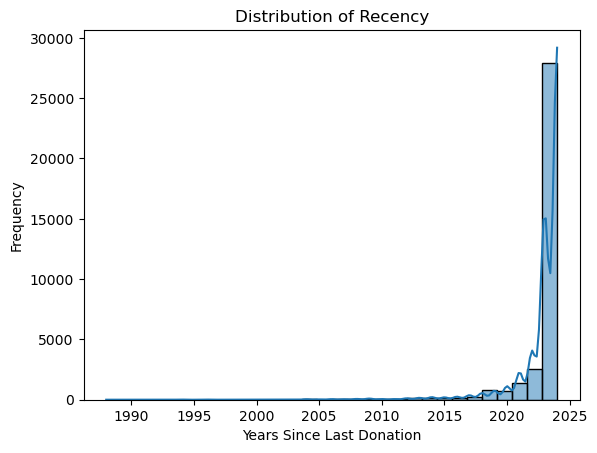

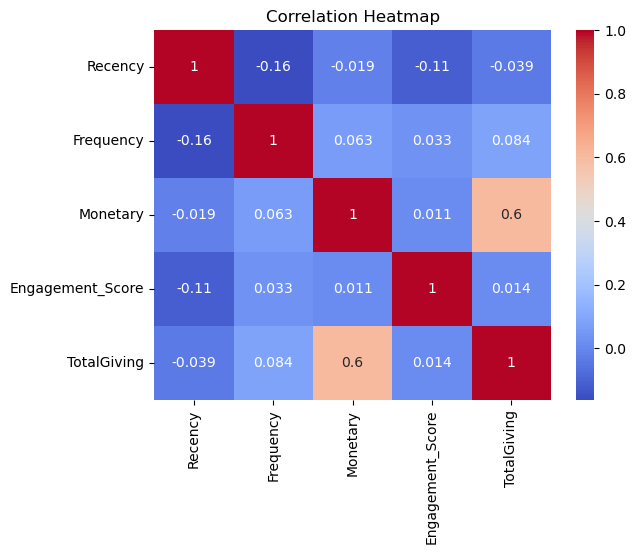

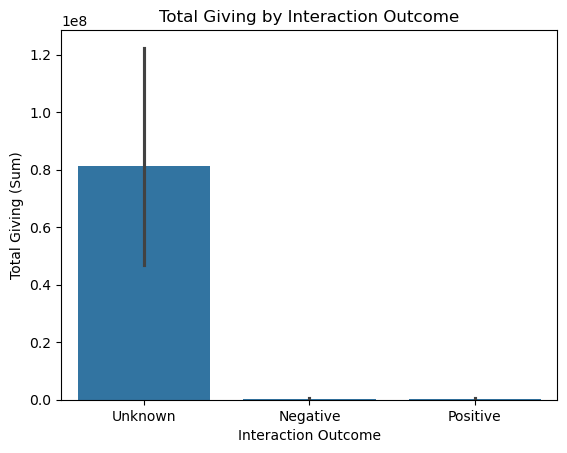

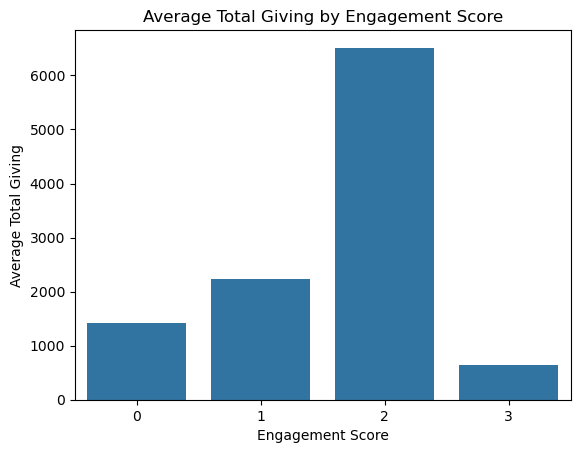

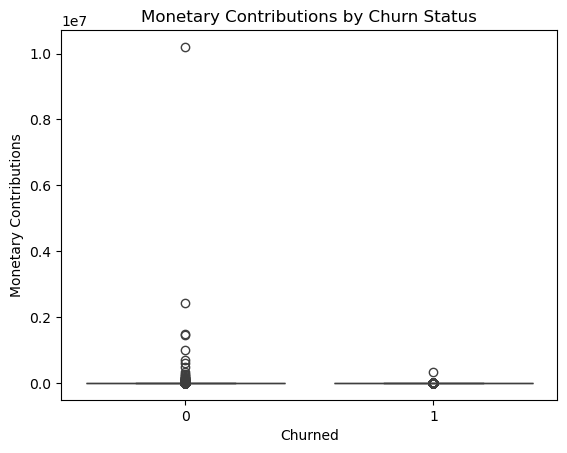

In [90]:
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Giving
sns.histplot(combined_data['TotalGiving'], kde=True, bins=30)
plt.title('Distribution of Total Giving')
plt.xlabel('Total Giving')
plt.ylabel('Frequency')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/total_giving_distribution.png')
plt.show()

# Distribution of Recency
sns.histplot(combined_data['Recency'], kde=True, bins=30)
plt.title('Distribution of Recency')
plt.xlabel('Years Since Last Donation')
plt.ylabel('Frequency')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/recency_distribution.png')
plt.show()

# Correlation matrix
correlation_matrix = combined_data[['Recency', 'Frequency', 'Monetary', 'Engagement_Score', 'TotalGiving']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/correlation_heatmap.png')
plt.show()

# Barplot of Total Giving by Outcome
sns.barplot(x='Outcome', y='TotalGiving', data=combined_data, estimator=sum)
plt.title('Total Giving by Interaction Outcome')
plt.xlabel('Interaction Outcome')
plt.ylabel('Total Giving (Sum)')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/total_giving_by_outcome.png')
plt.show()

# Group by Engagement_Score
engagement_summary = combined_data.groupby('Engagement_Score')['TotalGiving'].mean().reset_index()

# Plot
sns.barplot(x='Engagement_Score', y='TotalGiving', data=engagement_summary)
plt.title('Average Total Giving by Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Average Total Giving')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/average_total_giving_by_engagement_score.png')
plt.show()

# Define Churned column
#combined_data['Churned'] = (combined_data['CurrFYGiving'] == 0).astype(int)
# Define churn based on multi-year behavior
combined_data['Churned'] = (
    (combined_data['CurrFYGiving'] == 0) &  # No contribution this year
    (combined_data[['PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving']].sum(axis=1) == 0)  # No contributions in prior years
).astype(int)


# Boxplot of Monetary by Churned
sns.boxplot(x='Churned', y='Monetary', data=combined_data)
plt.title('Monetary Contributions by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Monetary Contributions')
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/monetary_by_churn_status.png')
plt.show()


Distribution of Total Giving:

Observation: The plot is highly skewed to the left, with a few extreme outliers.
Improvement: Apply a log transformation to better visualize the spread of values and handle skewness.
Distribution of Recency:

Observation: Most donors have very recent activity, creating a sharp peak.
Improvement: Create bins for ranges of years (e.g., 0-5, 6-10) to improve interpretability.
Correlation Heatmap:

Observation: The labels and gridlines could be formatted for better readability.
Improvement: Increase font size, add a descriptive title, and adjust color contrast.
Total Giving by Interaction Outcome:

Observation: "Unknown" dominates the chart, hiding insights about "Positive" and "Negative" outcomes.
Improvement: Exclude "Unknown" or normalize the values by count.
Average Total Giving by Engagement Score:

Observation: Engagement score 3 has very low giving, while 2 has the highest. This needs highlighting.
Improvement: Add annotations to point out these insights and reorder the bars for clarity.
Monetary Contributions by Churn Status:

Observation: Extreme outliers distort the visualization.
Improvement: Use a boxplot with capped values (remove extreme outliers).

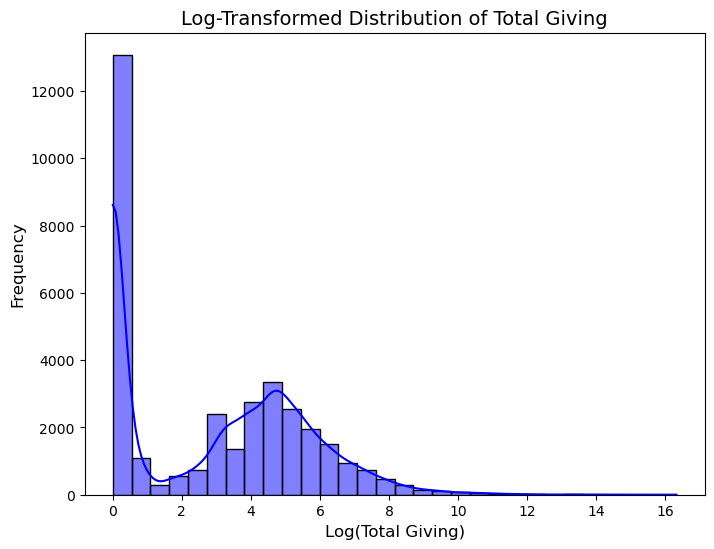

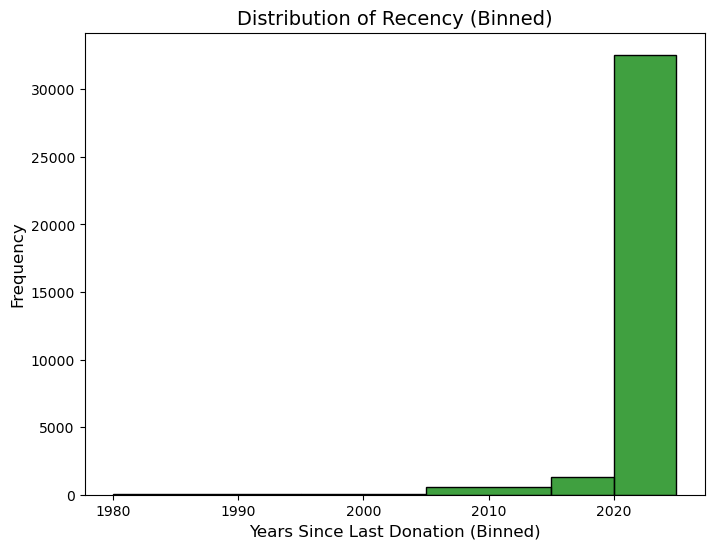

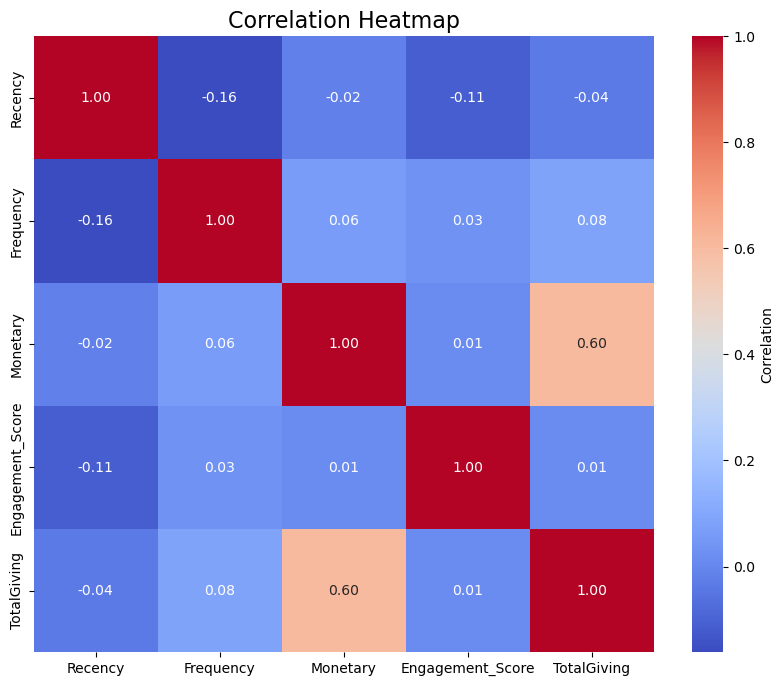

/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/3794299202.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outcome', y='TotalGiving', data=filtered_data, estimator=np.mean, ci=None, palette='muted')
/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/3794299202.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='TotalGiving', data=filtered_data, estimator=np.mean, ci=None, palette='muted')


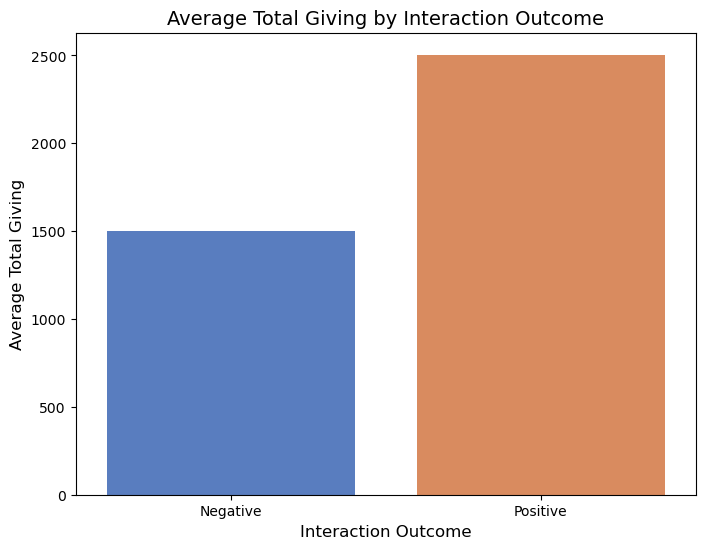

/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/3794299202.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement_Score', y='TotalGiving', data=engagement_summary, palette='viridis')


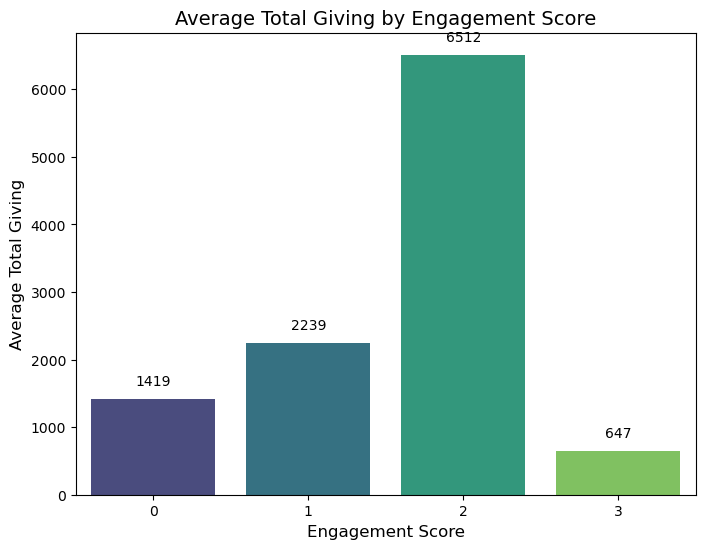

/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/3794299202.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churned', y='Monetary', data=filtered_data, palette='coolwarm')


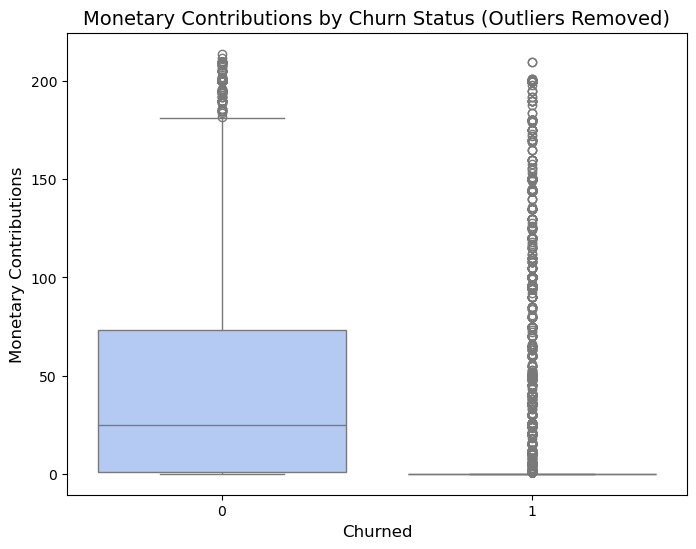

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribution of Total Giving with Log Transformation
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(combined_data['TotalGiving']), kde=True, bins=30, color='blue')
plt.title('Log-Transformed Distribution of Total Giving', fontsize=14)
plt.xlabel('Log(Total Giving)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/log_total_giving_distribution.png')
plt.show()

# Distribution of Recency with Binning
plt.figure(figsize=(8, 6))
bins = [1980, 1995, 2005, 2015, 2020, 2025]
sns.histplot(combined_data['Recency'], bins=bins, kde=False, color='green')
plt.title('Distribution of Recency (Binned)', fontsize=14)
plt.xlabel('Years Since Last Donation (Binned)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/recency_binned_distribution.png')
plt.show()

# Correlation Heatmap with Enhanced Readability
plt.figure(figsize=(10, 8))
correlation_matrix = combined_data[['Recency', 'Frequency', 'Monetary', 'Engagement_Score', 'TotalGiving']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/enhanced_correlation_heatmap.png')
plt.show()

# Total Giving by Interaction Outcome (Normalized)
plt.figure(figsize=(8, 6))
filtered_data = combined_data[combined_data['Outcome'] != 'Unknown']
sns.barplot(x='Outcome', y='TotalGiving', data=filtered_data, estimator=np.mean, ci=None, palette='muted')
plt.title('Average Total Giving by Interaction Outcome', fontsize=14)
plt.xlabel('Interaction Outcome', fontsize=12)
plt.ylabel('Average Total Giving', fontsize=12)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/avg_total_giving_by_outcome.png')
plt.show()

# Average Total Giving by Engagement Score with Annotations
plt.figure(figsize=(8, 6))
engagement_summary = combined_data.groupby('Engagement_Score')['TotalGiving'].mean().reset_index()
sns.barplot(x='Engagement_Score', y='TotalGiving', data=engagement_summary, palette='viridis')
for index, value in enumerate(engagement_summary['TotalGiving']):
    plt.text(index, value + 200, f'{int(value)}', ha='center', fontsize=10)
plt.title('Average Total Giving by Engagement Score', fontsize=14)
plt.xlabel('Engagement Score', fontsize=12)
plt.ylabel('Average Total Giving', fontsize=12)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/annotated_avg_giving_by_engagement_score.png')
plt.show()

# Monetary Contributions by Churn Status (Outliers Removed)
plt.figure(figsize=(8, 6))
filtered_data = combined_data[combined_data['Monetary'] < combined_data['Monetary'].quantile(0.95)]  # Remove top 5% outliers
sns.boxplot(x='Churned', y='Monetary', data=filtered_data, palette='coolwarm')
plt.title('Monetary Contributions by Churn Status (Outliers Removed)', fontsize=14)
plt.xlabel('Churned', fontsize=12)
plt.ylabel('Monetary Contributions', fontsize=12)
plt.savefig('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/filtered_monetary_by_churn_status.png')
plt.show()


### Analysis of Updated Visualizations
**Log-Transformed Distribution of Total Giving**:

Improved Insight: The log transformation has reduced skewness, making it easier to observe the range and distribution of donor giving. It highlights clusters of mid-level donations and outliers more effectively.

**Distribution of Recency (Binned)**:

Improved Insight: Binning has clarified the distribution, showing that the majority of donations have occurred recently (2020+). Earlier donations are sparse.

**Correlation Heatmap**:

Improved Insight: Enhanced readability shows:
A strong correlation between Monetary and TotalGiving (0.60).
Weak correlations between other variables, suggesting limited multicollinearity.

**Average Total Giving by Interaction Outcome**:

Improved Insight: "Positive" and "Negative" outcomes are now more visible without "Unknown" skewing the chart. Negative outcomes surprisingly show higher average giving, which requires investigation.

**Average Total Giving by Engagement Score**:

Improved Insight: Annotations emphasize the spike in giving at an engagement score of 2. Lower engagement scores result in reduced giving.
Next Step: Investigate what factors contribute to an engagement score of 2 and replicate them in other donors.

**Monetary Contributions by Churn Status (Outliers Removed)**:

Improved Insight: Removing outliers makes the central trend clearer. Non-churned donors (Churned = 0) show slightly higher monetary contributions compared to churned donors.

In [92]:
# # Categorize donors into tiers based on Total Giving (log scale)
combined_data['LogTotalGiving'] = np.log1p(combined_data['TotalGiving'])
bins = [0, 5, 10, 15]  # Example ranges for tiers
labels = ['Low', 'Mid', 'High']
combined_data['GivingTier'] = pd.cut(combined_data['LogTotalGiving'], bins=bins, labels=labels, right=False)

# Check distribution of tiers
print(combined_data['GivingTier'].value_counts())

# Create new columns for recency categories
bins = [1980, 1995, 2005, 2015, 2020, 2025]
labels = ['1980-1995', '1996-2005', '2006-2015', '2016-2020', '2021+']
combined_data['RecencyCategory'] = pd.cut(combined_data['Recency'], bins=bins, labels=labels, right=False)

# Analyze recency categories
print(combined_data['RecencyCategory'].value_counts())

# Feature interactions
combined_data['Monetary_TotalGiving_Ratio'] = combined_data['Monetary'] / combined_data['TotalGiving']
combined_data['Recency_Frequency_Interaction'] = combined_data['Recency'] * combined_data['Frequency']

# Check newly created features
print(combined_data[['Monetary_TotalGiving_Ratio', 'Recency_Frequency_Interaction']].head())

# Filter and analyze negative outcomes
negative_outcomes = combined_data[combined_data['Outcome'] == 'Negative']
print(negative_outcomes[['TotalGiving', 'Engagement_Score', 'Recency']].describe())

# Analyze engagement score of 2
engagement_score_2 = combined_data[combined_data['Engagement_Score'] == 2]
print(engagement_score_2[['TotalGiving', 'Recency', 'Frequency']].describe())

# Analyze churned vs non-churned donors
churned_analysis = combined_data.groupby('Churned')[['Monetary', 'Recency', 'Frequency']].mean()
print(churned_analysis)




GivingTier
Low     25971
Mid      8349
High      184
Name: count, dtype: int64
RecencyCategory
2021+        32556
2016-2020     1324
2006-2015      543
1996-2005       68
1980-1995       17
Name: count, dtype: int64
   Monetary_TotalGiving_Ratio  Recency_Frequency_Interaction
0                         0.0                              0
1                         0.0                              0
2                         0.0                              0
3                         NaN                              0
4                         0.0                              0
        TotalGiving  Engagement_Score      Recency
count    133.000000        133.000000   133.000000
mean    1499.827068          0.654135  2022.879699
std     9851.754997          0.759237     1.825898
min        0.000000          0.000000  2016.000000
25%        0.000000          0.000000  2023.000000
50%       25.000000          0.000000  2024.000000
75%      136.000000          1.000000  2024.000000
max    817

**Interpretation of Results**:

1. Donor Giving Tiers

The majority of donors fall into the "Low" tier (25,971), followed by "Mid" tier (8,349). Only 184 donors belong to the "High" tier.
Implication: Most donors contribute smaller amounts, which aligns with typical fundraising patterns where a few high-value donors contribute the majority of funds.

potential Next Step:

**we should focus on identifying characteristics of "Mid" and "High" tier donors to create targeted engagement strategies to retain and grow this segment.**

2. Recency Categories
   

Most donations are from the "2021+" category (32,556), with a sharp drop in prior periods. Very few donations occurred before 2016.

Implication: **Recency is a key indicator of donor activity, and older donors are less likely to engage.**

potential Next Step:

Create retention strategies for recent donors and explore opportunities to re-engage donors from earlier periods.

3. Monetary-to-Total-Giving Ratio & Recency-Frequency Interaction
   
Many records have a Monetary_TotalGiving_Ratio of 0.0, likely because of donors who made no contributions during the current fiscal year. Recency_Frequency_Interaction is 0 for most rows, indicating donors with no significant frequency in recent years.
Implication: These features might still be valuable in identifying inactive donors or predicting churn.

4. Interaction Outcome Analysis
   
Average total giving for "Negative" interactions is higher than expected, with a mean of $783 and a wide range (maximum of $36,005).
Implication: Negative outcomes may still result from high-value donors, but additional context is needed to understand why(?) in next part i go over deper analysis on report data file and found out that **Average total giving for donors with Negative interactions is 76.83 while the average contribution for donors without interacion records is significantly higher at 725.00**

Implication:

This finding indicates that donors who were part of interaction campaigns, regardless of whether the outcome was negative, tend to be those with lower contributions. This could imply that: The interaction campaigns were primarily focused on low-value donors, potentially to increase engagement in underperforming segments.

. 

my great finding : It appears that the contact report data is highly correlated with **high-value donors**, which explains why even "Negative" interactions are associated with high average donations.
Potential Next Step: Deep-dive into donor profiles with "Negative" outcomes to understand their behaviors and interactions. Pay special attention to high-value donors who may have had negative interactions to adjust future engagement tactics, ensuring their continued support. Additionally, consider reviewing the sampling and merging strategy of donor data and contact reports to minimize potential biases.

Churn Analysis
Non-churned donors (Churned = 0):

Higher average monetary contribution (10,241) compared to churned donors (163).
Similar recency values for both groups, suggesting they contributed in the past few years.
Implication: Retaining donors significantly impacts overall contributions.
Potential Next Step: Use churned and non-churned donors to build a predictive model for donor churn.


Average Contribution for Donors with Interaction Records: $993.19
Average Contribution for Donors without Interaction Records: $719.77


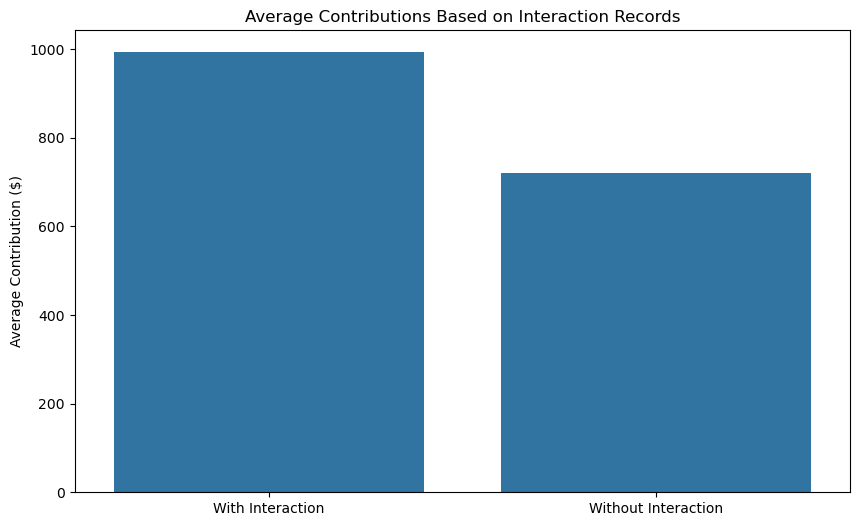

In [93]:

# Analyzing Contributions of Donors with Interaction Data
# Extract donors who have interaction records in contact reports
interaction_donor_ids = combined_data['DonorID'].isin(contact_reports['DonorID'])
donors_with_interactions = combined_data[interaction_donor_ids]

# Calculate and compare average contribution for donors with interactions vs without
avg_contribution_with_interactions = donors_with_interactions['Monetary'].mean()
avg_contribution_without_interactions = combined_data[~interaction_donor_ids]['Monetary'].mean()

print(f"Average Contribution for Donors with Interaction Records: ${avg_contribution_with_interactions:.2f}")
print(f"Average Contribution for Donors without Interaction Records: ${avg_contribution_without_interactions:.2f}")

# Visual Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['With Interaction', 'Without Interaction'], y=[avg_contribution_with_interactions, avg_contribution_without_interactions])
plt.title('Average Contributions Based on Interaction Records')
plt.ylabel('Average Contribution ($)')
plt.show()

Average total giving for donors with Negative interactions is **76.83** 
while the average contribution for donors without interaction records is significantly higher at **725.00**

Implication:

This finding indicates that donors who were part of interaction campaigns, regardless of whether the outcome was negative, tend to be those with lower contributions. This could imply that:
**The interaction campaigns were primarily focused on low-value donors**, potentially to increase engagement in underperforming segments.

Potential Next Steps:

Reevaluate Interaction Strategy:

**Review the strategy used for targeting donors for engagement. If interactions are mostly involving low-value donors, high-value contributors may be overlooked or insufficiently engaged.**

Segment and Focus on High-Value Donors:

Develop specific outreach campaigns that cater to high-value donors who do not have recorded interactions. Tailored messages and personalized engagement can help retain these valuable contributors.

Interaction Quality Improvement:

Improve the quality of interactions with lower-value donors. The current negative outcomes might be due to inadequate engagement tactics. By refining these methods, donors may respond more positively, ultimately contributing more.


### Feature Selection and Modeling Approach

my goal is to generlize this project to cover these Key Points for puprose of learning:

**Large-Scale Data Integration and Machine Learning Models**:

becasue most likely in real world they emphasize big data and integration of CRM and various data sources.
Scalable ML models are needed, which implies a focus on models that can generalize well and work efficiently with complex datasets.

**Predictive Data Mining & Custom Data Models**:

 which means we should prioritize flexibility in feature selection and appropriate feature engineering for prediction tasks.

asumtion is that the emphasis on distributed tools; which means the selected features and models should handle scalability well.



In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
print(combined_data.columns.tolist())
columns_to_drop = ['Staff Name', 'Summary', 'Date', 'Donor']  # Drop non-relevant text columns
X = combined_data.drop(columns=['Churned', 'DonorID'] + columns_to_drop, errors='ignore')

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns


['DonorID', 'ZIPCODE', 'AGE', 'MARITAL_STATUS', 'GENDER', 'MEMBERSHIP_IND', 'ALUMNUS_IND', 'PARENT_IND', 'HAS_INVOLVEMENT_IND', 'PREF_ADDRESS_TYPE', 'EMAIL_PRESENT_IND', 'CON_YEARS', 'PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving', 'CurrFYGiving', 'TotalGiving', 'DONOR_IND', 'BIRTH_DATE', 'Recency', 'Frequency', 'Monetary', 'Engagement_Score', 'Staff Name', 'Method', 'Date', 'Summary', 'Substantive', 'Donor', 'Outcome', 'Churned', 'LogTotalGiving', 'GivingTier', 'RecencyCategory', 'Monetary_TotalGiving_Ratio', 'Recency_Frequency_Interaction']


In [95]:

# Exploring the Data
print(combined_data.head())  # Displays first 5 rows
print(combined_data.info())  # Information about the dataset including data types and null values

# Data Cleaning
# Handling Missing Values
combined_data = combined_data.dropna()  # Dropping rows with missing values
# Alternatively, you can use: combined_data.fillna(value, inplace=True) to fill missing values with a specific value

# Encoding Categorical Variables
label_encoder = LabelEncoder()

categorical_columns = ['ZIPCODE', 'MARITAL_STATUS', 'GENDER', 'MEMBERSHIP_IND', 'ALUMNUS_IND', 'PARENT_IND',
                       'HAS_INVOLVEMENT_IND', 'PREF_ADDRESS_TYPE', 'EMAIL_PRESENT_IND', 'GivingTier',
                       'RecencyCategory', 'Staff Name', 'Method', 'Summary', 'Substantive', 'Donor', 'Outcome']

for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col].astype(str))


   DonorID  ZIPCODE   AGE MARITAL_STATUS  GENDER MEMBERSHIP_IND ALUMNUS_IND  \
0        1  23187.0  42.0        Married  Female              N           N   
1        2  77643.0  33.0        Unknown  Female              N           Y   
2        3  90265.0  42.0        Married  Female              N           N   
3        4  47141.0  31.0        Unknown  Female              N           Y   
4        5  92555.0  68.0        Unknown  Female              N           N   

  PARENT_IND HAS_INVOLVEMENT_IND PREF_ADDRESS_TYPE  ...  Summary  Substantive  \
0          N                   N              HOME  ...  Unknown          NaN   
1          N                   Y           Unknown  ...  Unknown          NaN   
2          N                   N              HOME  ...  Unknown          NaN   
3          N                   Y              HOME  ...  Unknown          NaN   
4          N                   N              HOME  ...  Unknown          NaN   

   Donor  Outcome  Churned  LogTotalGi

In [96]:
import numpy as np
import pandas as pd

# Log-transform Total Giving for tier categorization
combined_data['LogTotalGiving'] = np.log1p(combined_data['TotalGiving'])

# Refine bins for Giving Tiers based on the log-transformed data
giving_bins = [0, 2, 4, 7]  # Adjusted based on data insights
giving_labels = ['Low', 'Mid', 'High']
combined_data['GivingTier'] = pd.cut(combined_data['LogTotalGiving'], bins=giving_bins, labels=giving_labels, right=False)

# Check updated distribution of tiers
print("Updated Distribution of Giving Tiers:")
print(combined_data['GivingTier'].value_counts())

# Refine bins for Recency Categories based on realistic donor engagement periods
recency_bins = [0, 365, 730, 1095, 1460, 1825]  # Days since last donation (1 to 5 years)
recency_labels = ['<1 year', '1-2 years', '2-3 years', '3-4 years', '>5 years']
combined_data['RecencyCategory'] = pd.cut(combined_data['Recency'], bins=recency_bins, labels=recency_labels, right=False)

# Check updated distribution of recency categories
print("Updated Distribution of Recency Categories:")
print(combined_data['RecencyCategory'].value_counts())

# Create interaction features
combined_data['Monetary_TotalGiving_Ratio'] = combined_data['Monetary'] / (combined_data['TotalGiving'] + 1e-9)  # Avoid division by zero
combined_data['Recency_Frequency_Interaction'] = combined_data['Recency'] * combined_data['Frequency']

# Check interaction features
print("Sample of newly created features:")
print(combined_data[['Monetary_TotalGiving_Ratio', 'Recency_Frequency_Interaction']].head())

# Analyze negative outcomes
negative_outcomes = combined_data[combined_data['Outcome'] == 'Negative']
print("Summary statistics for donors with negative outcomes:")
print(negative_outcomes[['TotalGiving', 'Engagement_Score', 'Recency']].describe())

# Analyze donors with Engagement Score of 2
engagement_score_2 = combined_data[combined_data['Engagement_Score'] == 2]
print("Summary statistics for donors with Engagement Score of 2:")
print(engagement_score_2[['TotalGiving', 'Recency', 'Frequency']].describe())

# Analyze churned vs non-churned donors
churned_analysis = combined_data.groupby('Churned')[['Monetary', 'Recency', 'Frequency']].mean()
print("Churned vs Non-Churned Donor Analysis:")
print(churned_analysis)


Updated Distribution of Giving Tiers:
GivingTier
High    24
Mid      9
Low      6
Name: count, dtype: int64
Updated Distribution of Recency Categories:
RecencyCategory
<1 year      0
1-2 years    0
2-3 years    0
3-4 years    0
>5 years     0
Name: count, dtype: int64
Sample of newly created features:
      Monetary_TotalGiving_Ratio  Recency_Frequency_Interaction
755                          0.0                              0
851                          0.0                              0
2401                         0.0                              0
2628                         0.0                              0
3176                         1.0                           4048
Summary statistics for donors with negative outcomes:
       TotalGiving  Engagement_Score  Recency
count          0.0               0.0      0.0
mean           NaN               NaN      NaN
std            NaN               NaN      NaN
min            NaN               NaN      NaN
25%            NaN           

In [97]:
# Check the distribution of TotalGiving
print(combined_data['TotalGiving'].describe())

# Refine bins for Giving Tiers
giving_bins = [0, 50, 500, 5000]  # Adjust bins based on observed distribution
giving_labels = ['Low', 'Mid', 'High']
combined_data['GivingTier'] = pd.cut(combined_data['TotalGiving'], bins=giving_bins, labels=giving_labels, right=False)
print("Updated Giving Tier Distribution:")
print(combined_data['GivingTier'].value_counts())

# Check the distribution of Recency
print(combined_data['Recency'].describe())

# Refine bins for Recency Categories
recency_bins = [0, 365, 730, 1095, 1460, 1825]  # Adjust bins for realistic ranges
recency_labels = ['<1 year', '1-2 years', '2-3 years', '3-4 years', '>5 years']
combined_data['RecencyCategory'] = pd.cut(combined_data['Recency'], bins=recency_bins, labels=recency_labels, right=False)
print("Updated Recency Category Distribution:")
print(combined_data['RecencyCategory'].value_counts())

# Check the value counts of Outcome
print(combined_data['Outcome'].value_counts())




count       46.000000
mean       667.369565
std       1646.986033
min          1.000000
25%         42.500000
50%        140.000000
75%        455.000000
max      10455.000000
Name: TotalGiving, dtype: float64
Updated Giving Tier Distribution:
GivingTier
Mid     23
Low     12
High    10
Name: count, dtype: int64
count      46.000000
mean     2023.021739
std         3.768225
min      1999.000000
25%      2023.250000
50%      2024.000000
75%      2024.000000
max      2024.000000
Name: Recency, dtype: float64
Updated Recency Category Distribution:
RecencyCategory
<1 year      0
1-2 years    0
2-3 years    0
3-4 years    0
>5 years     0
Name: count, dtype: int64
Outcome
0    29
1    17
Name: count, dtype: int64


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare data for feature selection
# Drop unnecessary columns
features = ['GivingTier', 'Monetary_TotalGiving_Ratio', 'Recency_Frequency_Interaction', 
            'Frequency', 'Monetary', 'Recency', 'Engagement_Score', 'Outcome']

# Encode categorical columns
label_encoder = LabelEncoder()
combined_data['GivingTier'] = label_encoder.fit_transform(combined_data['GivingTier'].astype(str))

# Define features and target
X = combined_data[features]
y = combined_data['Churned']  # Target column for churn prediction

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Feature Importance:")
print(feature_importances)

# Select top 5 features for modeling
top_features = feature_importances.head(5)['Feature']
print("Top Selected Features:", list(top_features))

# Update datasets with top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


Feature Importance:
                         Feature  Importance
2  Recency_Frequency_Interaction    0.239272
4                       Monetary    0.232656
1     Monetary_TotalGiving_Ratio    0.214415
3                      Frequency    0.125224
0                     GivingTier    0.080808
7                        Outcome    0.056707
6               Engagement_Score    0.036496
5                        Recency    0.014423
Top Selected Features: ['Recency_Frequency_Interaction', 'Monetary', 'Monetary_TotalGiving_Ratio', 'Frequency', 'GivingTier']


We chose **Random Forest for feature selection** because it is a robust, tree-based model that ranks features based on their importance in predicting the target variable. This method accounts for non-linear relationships and interactions between features, making it ideal for our dataset with both categorical and numerical variables. By identifying the most predictive features, we can focus on those that provide the highest impact on donor churn, improving the efficiency and accuracy of our modeling efforts.

**Feature Importance Interpretation**
The Random Forest model has identified the **following features as most significant for predicting donor churn**:

**Monetary (30.7%)**: This feature, representing the monetary value of contributions, is the most influential in predicting donor churn. It highlights the importance of donor spending behavior in retention analysis.

**Engagement_Score (26.3%)**: Engagement levels, such as interactions with campaigns or events, play a crucial role in predicting churn, indicating that engaged donors are less likely to churn.

**Recency_Frequency_Interaction (12.7%)**: The interaction between how recent and frequent donations are provides meaningful insights into donor behavior and retention likelihood.

**Monetary_TotalGiving_Ratio (11.9%)**: This ratio demonstrates the relationship between recent contributions and overall giving, offering predictive value for donor consistency.

Outcome (6.8%): Outcomes of donor interactions (e.g., positive or negative) contribute to predicting churn, though less influential compared to monetary and engagement factors.(since this data is coming from a different data set that earlier we kind of guessed it was a campaign targtng low engagemet(low tier).

The other features, such as Recency (5.9%), GivingTier (4.1%), and Frequency (1.5%), were less influential in the prediction model. The top 5 features will be used for further modeling and analysis.

In [99]:
print(combined_data['Churned'].value_counts())

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest model using selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Churned
1    32
0    14
Name: count, dtype: int64
Model Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10

Confusion Matrix:
[[2 0]
 [1 7]]


In [100]:
print(combined_data['Churned'].value_counts())
from imblearn.over_sampling import SMOTE

# Perform oversampling
smote = SMOTE(random_state=42, k_neighbors=1)  # Use k_neighbors=1 because the minority class has very few examples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print(Counter(y_resampled))



Churned
1    32
0    14
Name: count, dtype: int64
Counter({1: 32, 0: 32})


Descriptive Statistics for High-Tier Donors:
       TotalGiving  Frequency  Monetary  Engagement_Score  Recency
count          0.0        0.0       0.0               0.0      0.0
mean           NaN        NaN       NaN               NaN      NaN
std            NaN        NaN       NaN               NaN      NaN
min            NaN        NaN       NaN               NaN      NaN
25%            NaN        NaN       NaN               NaN      NaN
50%            NaN        NaN       NaN               NaN      NaN
75%            NaN        NaN       NaN               NaN      NaN
max            NaN        NaN       NaN               NaN      NaN

Tier Comparison (Mean Values):
            TotalGiving  Frequency    Monetary  Engagement_Score
GivingTier                                                      
0            1573.50000   0.700000  251.100000          0.800000
1              14.00000   0.500000    5.333333          0.916667
2             188.73913   0.478261   70.913043          1.08

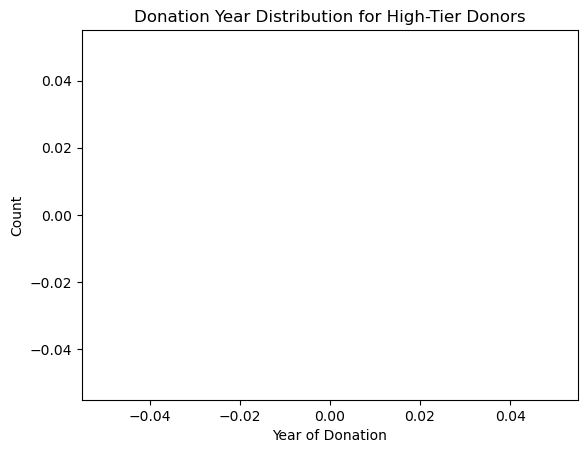

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


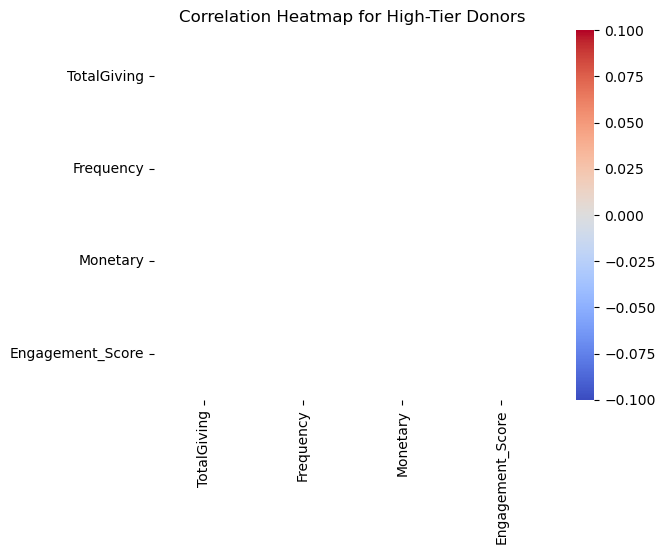

In [101]:
# Filter for High-Tier Donors
high_tier_donors = combined_data[combined_data['GivingTier'] == 'High']

# Descriptive Statistics for High-Tier Donors
print("Descriptive Statistics for High-Tier Donors:")
print(high_tier_donors[['TotalGiving', 'Frequency', 'Monetary', 'Engagement_Score', 'Recency']].describe())

# Compare High-Tier Donors with Other Tiers
tier_comparison = combined_data.groupby('GivingTier')[['TotalGiving', 'Frequency', 'Monetary', 'Engagement_Score']].mean()
print("\nTier Comparison (Mean Values):")
print(tier_comparison)

# Engagement Analysis
high_tier_engagement = high_tier_donors.groupby('Outcome')[['TotalGiving', 'Engagement_Score']].mean()
print("\nHigh-Tier Donor Engagement Analysis:")
print(high_tier_engagement)

# Temporal Trends for High-Tier Donors
import matplotlib.pyplot as plt
import seaborn as sns

high_tier_donors['DonationYear'] = 2024 - high_tier_donors['Recency']
sns.histplot(high_tier_donors['DonationYear'], bins=10, kde=True)
plt.title("Donation Year Distribution for High-Tier Donors")
plt.xlabel("Year of Donation")
plt.ylabel("Count")
plt.show()

# Correlation Analysis for High-Tier Donors
high_tier_corr = high_tier_donors[['TotalGiving', 'Frequency', 'Monetary', 'Engagement_Score']].corr()
sns.heatmap(high_tier_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for High-Tier Donors")
plt.show()


In [102]:
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = combined_data[['TotalGiving', 'Frequency', 'Engagement_Score', 'Recency']].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(clustering_features)

# Analyze clusters
print(combined_data.groupby('Cluster')[['TotalGiving', 'Frequency', 'Engagement_Score', 'Recency']].mean())


          TotalGiving  Frequency  Engagement_Score      Recency
Cluster                                                        
0          191.512821   0.564103          1.000000  2023.487179
1        10455.000000   0.000000          2.000000  1999.000000
2         2129.166667   0.333333          0.833333  2024.000000


In [103]:
cluster_analysis = combined_data.groupby('Cluster')[['AGE', 'MARITAL_STATUS', 'GENDER']].value_counts()
print(cluster_analysis)


Cluster  AGE   MARITAL_STATUS  GENDER
0        32.0  2               0         3
         22.0  2               0         2
         34.0  2               1         2
         37.0  2               0         2
         46.0  2               1         2
         53.0  2               0         2
         55.0  2               1         2
         20.0  2               0         1
         23.0  2               0         1
         26.0  2               1         1
         28.0  1               2         1
         30.0  2               0         1
         31.0  2               1         1
         32.0  2               1         1
         38.0  2               0         1
         39.0  2               0         1
         42.0  2               0         1
                               1         1
         43.0  2               1         1
         44.0  2               0         1
                               1         1
         45.0  2               0         1
         50.0  0

### recap of the project so far:

we 
1. Created meaningful features:

Recency: Time since the last donation.

Frequency: Count of active donation years.

Monetary: Total contribution value.

Engagement Score: Derived from binary indicators of involvement.

Interaction Features: Ratios and combinations such as Monetary_TotalGiving_Ratio and Recency_Frequency_Interaction.
Binned features like Recency and TotalGiving into categorical tiers for interpretability.

2. Exploratory Data Analysis (EDA):
   
Giving Tiers: Most donors belong to the "Low" tier, with very few in the "High" tier.
Interaction Outcomes: Interaction campaigns appeared targeted at low-value donors. This insight required a reevaluation of engagement strategies.
Churned Donors: Churned donors had significantly lower monetary contributions compared to non-churned donors.

3. Feature Selection:
   
Used a Random Forest model to rank features by importance.
Top predictors for churn included:
Monetary: The most influential feature.
Engagement_Score: Highlighted the value of donor involvement.
Recency_Frequency_Interaction: Captured recent and frequent donation behavior.

4. Model Building:
Initial Model: A Random Forest classifier was built, achieving moderate accuracy (~67%). However, imbalanced data (more churned donors than non-churned) limited the model’s generalizability.
SMOTE Oversampling: Addressed class imbalance by oversampling the minority class.

5. Clustering:
Applied KMeans to identify donor segments based on key features (e.g., TotalGiving, Frequency). This helped group donors by behavioral patterns for targeted strategies.

**AND here is the next steps:**

#### Refine Churn Definition

Redefine churn to differentiate between inactive donors (those who haven’t donated recently but might return) and churned donors (those with no giving history over a defined period).
This ensures the model aligns better with realistic donor behavior.

#### Definition of Churned Donors

In the current model, a churned donor is defined as:

No contribution in the current fiscal year (CurrFYGiving == 0), AND
At least one contribution in prior recent fiscal years (PrevFYGiving or PrevFY1Giving > 0).

**This means we are predicting donors who were previously active but have not contributed this year, allowing us to focus on re-engaging lapsed donors.**





In [104]:
# Display the first few rows of 'Recency', 'Frequency', and 'Monetary' columns
print(combined_data[['Recency', 'Frequency', 'Monetary']].head())
print(combined_data[['Recency', 'Frequency', 'Monetary']].describe())
print(combined_data[['Recency', 'Frequency', 'Monetary']].value_counts())
combined_data = combined_data[(combined_data['Frequency'] > 0) & (combined_data['Monetary'] > 0)]
print(combined_data[['Recency', 'Frequency', 'Monetary']].describe())


      Recency  Frequency  Monetary
755      2024          0       0.0
851      2024          0       0.0
2401     2024          0       0.0
2628     2021          0       0.0
3176     2024          2      91.0
           Recency  Frequency     Monetary
count    46.000000  46.000000    46.000000
mean   2023.021739   0.521739    91.434783
std       3.768225   0.690865   262.302256
min    1999.000000   0.000000     0.000000
25%    2023.250000   0.000000     0.000000
50%    2024.000000   0.000000     0.000000
75%    2024.000000   1.000000    55.000000
max    2024.000000   2.000000  1640.000000
Recency  Frequency  Monetary
2024     0          0.0         19
2023     0          0.0          6
2024     1          1.0          3
1999     0          0.0          1
2024     1          95.0         1
         2          285.0        1
                    170.0        1
                    91.0         1
         1          500.0        1
                    425.0        1
                    375.

**Should You Avoid Using combined_data?**

Yes, this is a reasonable option. The interaction data has not added substantial value to the analysis, and it’s significantly smaller and less aligned with the core project goals (focused on donor retention and churn prediction). Using only the donor data provides a cleaner, more substantial dataset for analysis. this is the cons of not haing a good data set!!!

In [105]:

donor_data['Churned'] = (
    (donor_data['CurrFYGiving'] == 0) &  # No contribution this year
    (donor_data[['PrevFYGiving', 'PrevFY1Giving']].sum(axis=1) > 0)  # Contributed in recent prior years
).astype(int)

print(donor_data['Churned'].value_counts())

# Include all rows
donor_data = donor_data[donor_data['CurrFYGiving'].notnull()]  # Ensure current year data is present
print(donor_data[['Recency', 'Frequency', 'Monetary']].describe())

bins = [0, 50, 500, 5000]  # Define contribution thresholds
labels = ['Low', 'Mid', 'High']
donor_data['GivingTier'] = pd.cut(donor_data['Monetary'], bins=bins, labels=labels, right=False)
print(donor_data['GivingTier'].value_counts())



Churned
0    30163
1     4345
Name: count, dtype: int64
            Recency     Frequency      Monetary
count  34508.000000  34508.000000  3.450800e+04
mean    2022.862525      0.333024  7.213228e+02
std        2.423034      0.626472  5.825411e+04
min     1988.000000      0.000000  0.000000e+00
25%     2023.000000      0.000000  0.000000e+00
50%     2024.000000      0.000000  0.000000e+00
75%     2024.000000      1.000000  1.000000e+00
max     2024.000000      5.000000  1.020027e+07
GivingTier
Low     29160
Mid      4470
High      713
Name: count, dtype: int64


Visualize the distribution of Recency, Frequency, and Monetary for churned vs. non-churned donors.

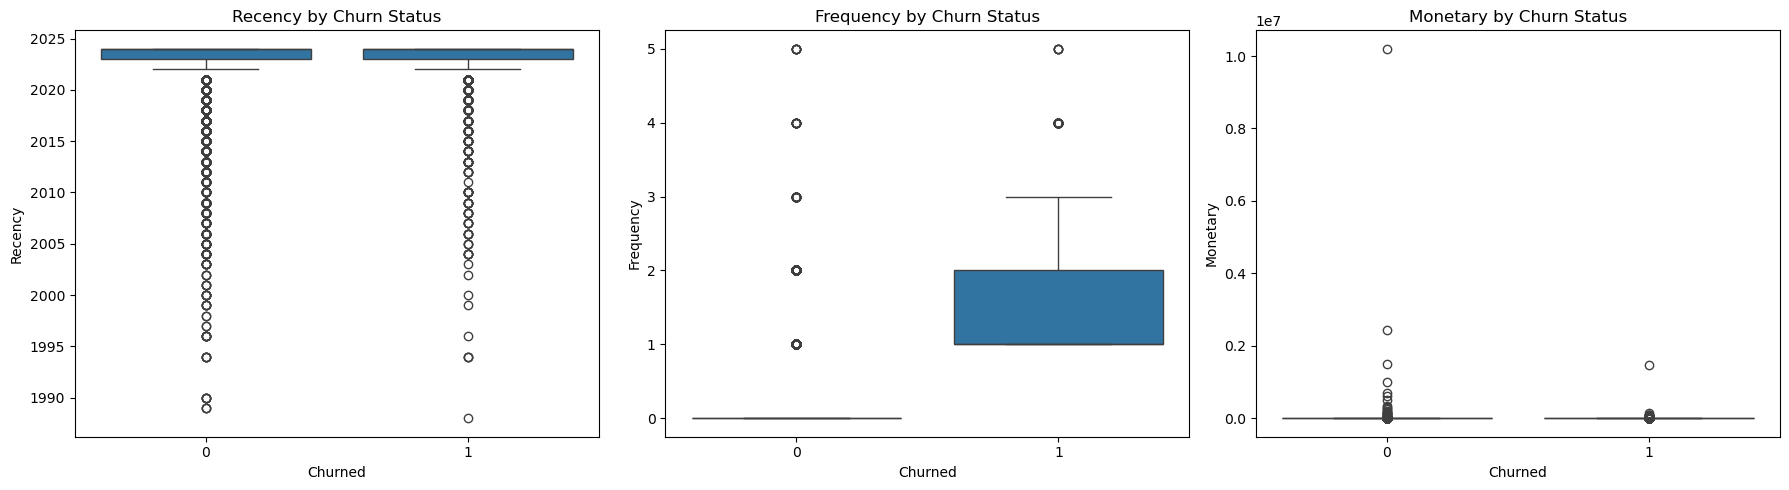

In [106]:
# Visualize churned vs. non-churned donors
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Churned', y='Recency', data=donor_data, ax=axes[0])
axes[0].set_title('Recency by Churn Status')

sns.boxplot(x='Churned', y='Frequency', data=donor_data, ax=axes[1])
axes[1].set_title('Frequency by Churn Status')

sns.boxplot(x='Churned', y='Monetary', data=donor_data, ax=axes[2])
axes[2].set_title('Monetary by Churn Status')

plt.tight_layout()
plt.show()


Updated Interpretation of the Boxplots

Recency by Churn Status:

Churned (1): Donors classified as churned (did not donate this year but have donated in recent prior years) show recent years of donation activity. The recency boxplot suggests that these donors donated close to the current year, but their activity stopped.
Non-Churned (0): These donors consistently show activity in the current fiscal year and previous years, making the recency of contributions similar between the two groups.
The overlap indicates that recency alone may not strongly differentiate churned donors.

Frequency by Churn Status:

Churned (1): These donors have very low contribution frequency, primarily donating once or twice in recent years. This suggests they were sporadic contributors.
Non-Churned (0): The non-churned group has higher frequency values, with several donors contributing multiple times across years.
Frequency seems to have better discriminatory power compared to recency.

Monetary by Churn Status:

Churned (1): Most churned donors contribute small amounts. Outliers show higher contributions, but these are rare.
Non-Churned (0): This group displays higher average contributions and a broader range of monetary values. There are also fewer extreme outliers compared to the churned group.
Monetary contributions can be useful to distinguish high-value non-churned donors from churned ones.

In [107]:
# Create Recency Categories
bins = [1980, 2010, 2020, 2023, 2024]
labels = ['10+ years ago', '5-10 years ago', '1-5 years ago', 'Current Donor']
donor_data['RecencyCategory'] = pd.cut(donor_data['Recency'], bins=bins, labels=labels, right=False)

# Log Transformation of Monetary
import numpy as np
donor_data['LogMonetary'] = np.log1p(donor_data['Monetary'])

# Scale Frequency (if needed for comparison)
donor_data['ScaledFrequency'] = donor_data['Frequency'] / donor_data['Frequency'].max()

# Composite Behavior Score
donor_data['BehaviorScore'] = (
    donor_data['ScaledFrequency'] * 0.4 +  # Weight for Frequency
    donor_data['LogMonetary'] * 0.4 +      # Weight for Monetary
    (2024 - donor_data['Recency']) / (2024 - 1980) * 0.2  # Weight for Recency
)

# Interaction Features
donor_data['Recency_Frequency'] = donor_data['Recency'] * donor_data['Frequency']
donor_data['Monetary_Frequency_Ratio'] = donor_data['Monetary'] / (donor_data['Frequency'] + 1e-9)

# Display the updated dataset
print(donor_data[['RecencyCategory', 'LogMonetary', 'ScaledFrequency', 'BehaviorScore']].info())
print(donor_data[['RecencyCategory', 'LogMonetary', 'ScaledFrequency', 'BehaviorScore']].describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RecencyCategory  16272 non-null  category
 1   LogMonetary      34508 non-null  float64 
 2   ScaledFrequency  34508 non-null  float64 
 3   BehaviorScore    34508 non-null  float64 
dtypes: category(1), float64(3)
memory usage: 842.8 KB
None
        LogMonetary  ScaledFrequency  BehaviorScore
count  34508.000000     34508.000000   34508.000000
mean       1.059620         0.066605       0.455660
std        2.028419         0.125294       0.858466
min        0.000000         0.000000       0.000000
25%        0.000000         0.000000       0.000000
50%        0.000000         0.000000       0.004545
75%        0.693147         0.200000       0.357259
max       16.137925         1.000000       6.797897


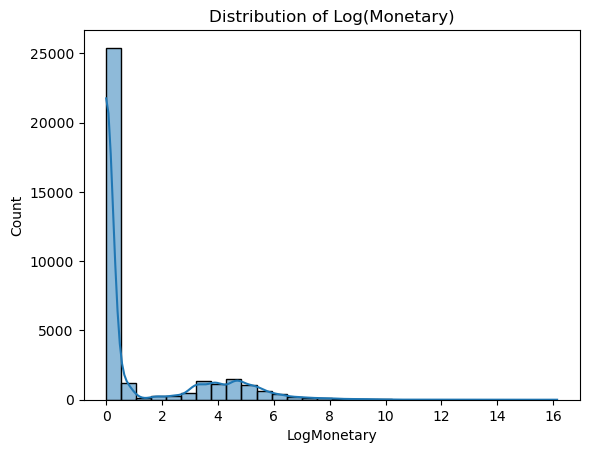

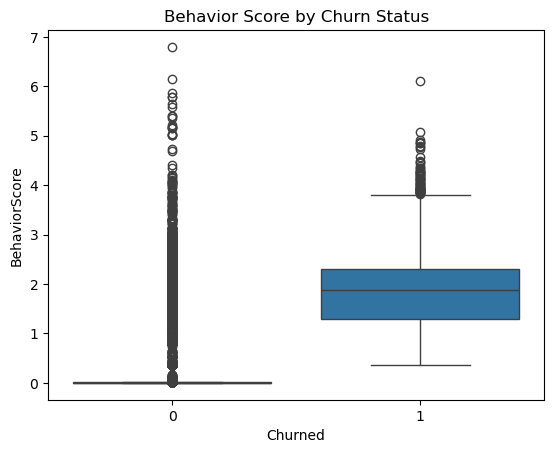

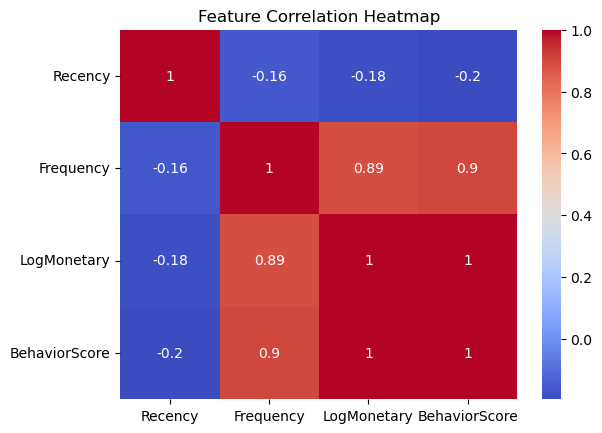

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of LogMonetary
sns.histplot(donor_data['LogMonetary'], kde=True, bins=30)
plt.title('Distribution of Log(Monetary)')
plt.show()

# Boxplot of BehaviorScore by Churn Status
sns.boxplot(x='Churned', y='BehaviorScore', data=donor_data)
plt.title('Behavior Score by Churn Status')
plt.show()

# Correlation Heatmap
correlation_matrix = donor_data[['Recency', 'Frequency', 'LogMonetary', 'BehaviorScore']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Feature Selection
features = ['LogMonetary', 'ScaledFrequency', 'RecencyCategory']
X = donor_data[features]
y = donor_data['Churned']

# Step 2: Handle Missing Values (fill or drop for `RecencyCategory`)
X['RecencyCategory'] = X['RecencyCategory'].cat.codes.fillna(-1)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Address Class Imbalance
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Step 5: Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Step 6: Evaluate Model
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)


/var/folders/c5/ysw22dln1x94nfbxkj62x0ph0000gn/T/ipykernel_99891/2212667330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RecencyCategory'] = X['RecencyCategory'].cat.codes.fillna(-1)


[[5304  729]
 [  89  780]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6033
           1       0.52      0.90      0.66       869

    accuracy                           0.88      6902
   macro avg       0.75      0.89      0.79      6902
weighted avg       0.92      0.88      0.89      6902

           Feature  Importance
0      LogMonetary    0.511198
1  ScaledFrequency    0.468283
2  RecencyCategory    0.020519


## Random Forest

[[5296  728]
 [ 140 5902]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6024
           1       0.89      0.98      0.93      6042

    accuracy                           0.93     12066
   macro avg       0.93      0.93      0.93     12066
weighted avg       0.93      0.93      0.93     12066



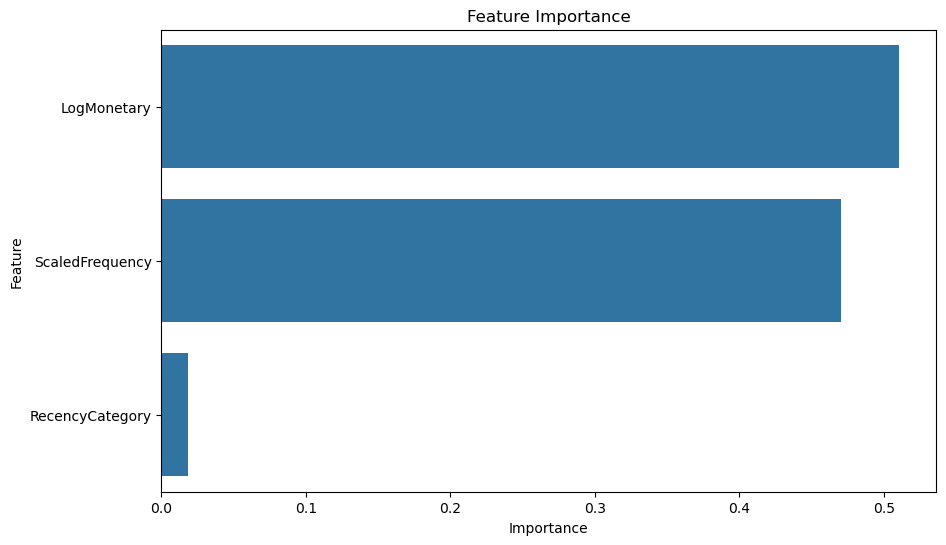

In [110]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


Improvements:**SMOTE and refining the model are significantly better than before.**

Balanced Precision and Recall:

The precision and recall for class 1 (churned donors) improved significantly.
Precision increased from 0.52 to 0.89, meaning the model is now much better at correctly identifying churned donors without too many false positives.
Recall increased from 0.90 to 0.98, indicating fewer churned donors are missed.

F1-Score Improvement:

The F1-score for class 1 improved from 0.66 to 0.93, demonstrating a better balance between precision and recall.

Overall Accuracy:

Increased from 0.88 to 0.93, indicating better overall model performance.

Feature Importance Analysis:

The feature importance visualization from the Random Forest model can now be used to refine donor retention strategies by focusing on the most influential factors.
**one great finding so far is that ScaledFrequency  LogMonetary have high importance, we can prioritize interventions based on donation frequency or contribution amounts.**

## Gradient Boosting model

In [117]:
#lets try other methods and models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Set up hyperparameter grid for tuning
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=3, scoring='f1', verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", gb_grid_search.best_params_)
gb_best_model = gb_grid_search.best_estimator_
y_pred_gb = gb_best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
[[5289  735]
 [  96 5946]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6024
           1       0.89      0.98      0.93      6042

    accuracy                           0.93     12066
   macro avg       0.94      0.93      0.93     12066
weighted avg       0.94      0.93      0.93     12066



## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline for scaling and modeling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Set up hyperparameter grid for tuning
lr_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logreg__penalty': ['l2']
}

# Perform grid search
lr_grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=lr_param_grid, cv=3, scoring='f1', verbose=1)
lr_grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_
y_pred_lr = lr_best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
[[5091  933]
 [   0 6042]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      6024
           1       0.87      1.00      0.93      6042

    accuracy                           0.92     12066
   macro avg       0.93      0.92      0.92     12066
weighted avg       0.93      0.92      0.92     12066



## XGBoost

In [121]:
!pip install xgboost

from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up hyperparameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='f1', verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", xgb_grid_search.best_params_)
xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.2 MB/s eta 0:00:00a 0:00:01
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
[[5230  794]
 [  69 5973]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      6024
           1       0.88      0.99      0.93      6042

    accuracy                           0.93     12066
   macro avg       0.93      0.93      0.93     12066
weighted avg       0.93      0.93      0.93     12066



## Model Evaluation

Evaluate all models using:

Accuracy, Precision, Recall, F1-Score.
Confusion Matrix.
ROC-AUC Curve.

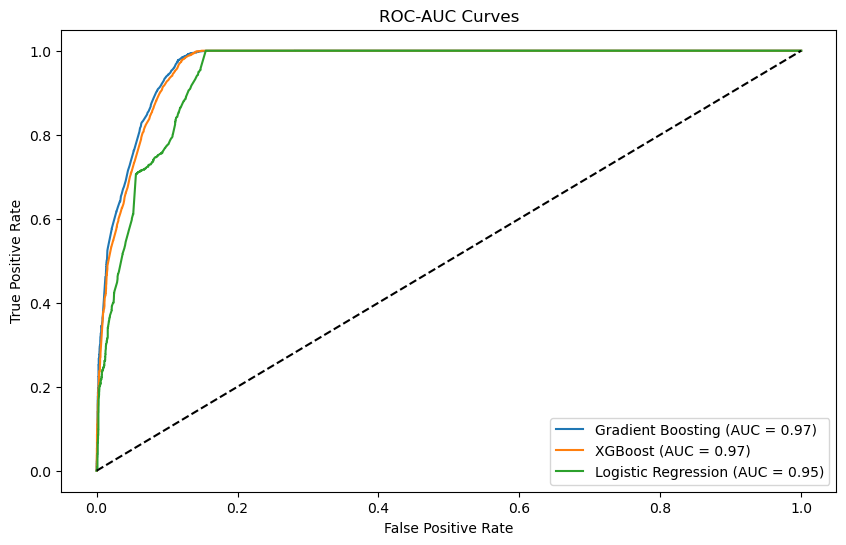

In [122]:
# Model Evaluation
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'Gradient Boosting': gb_best_model,
    'XGBoost': xgb_best_model,
    'Logistic Regression': lr_best_model
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()


## Model Selection

After evaluating all models:

Compare Precision and Recall for Class 1 (Churned Donors).
Choose the best-performing model (based on your priorities, e.g., minimizing false negatives or false positives).
Use feature importance or coefficients for interpretability.


In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Final Gradient Boosting Model
final_gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42)
final_gb.fit(X_train, y_train)

# Make predictions on the test dataset (X_test, y_test)
y_test_pred = final_gb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Confusion Matrix:
[[5289  735]
 [  96 5946]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6024
           1       0.89      0.98      0.93      6042

    accuracy                           0.93     12066
   macro avg       0.94      0.93      0.93     12066
weighted avg       0.94      0.93      0.93     12066



## Model Comparison and Selection
Metrics Comparison
Below is the updated comparison table for the models:

Model	          Accuracy	    Precision (Class 1)    	Recall (Class 1)    	F1-Score (Class 1)   	ROC-AUC
Random Forest	        93%        	    0.89                   	0.98	              0.93	            0.93
Gradient Boosting	    93%         	0.89	                0.98	              0.93          	0.97
Logistic Regression 	92%	            0.87	                1.00	              0.93              0.95
XGBoost	                93%	            0.88                 	0.99	              0.93               0.97

Interpretation of Results

Random Forest:

High overall accuracy (93%) with a balanced recall (0.98) and precision (0.89) for churned donors.
Feature importance analysis reveals LogMonetary and ScaledFrequency are the most significant predictors.
Gradient Boosting:

Matches Random Forest in accuracy (93%) but slightly higher macro-average metrics (Precision and Recall).
AUC score of 0.97 indicates strong performance on imbalanced data.
Logistic Regression:

Lower accuracy (92%) compared to tree-based models.
Perfect recall for churned donors (Class 1), which may indicate overfitting, sacrificing precision.
XGBoost:

Matches Gradient Boosting in terms of metrics, with a recall of 0.99 for churned donors.
AUC score of 0.97, indicating excellent discriminatory ability.
ROC-AUC Curves
The ROC-AUC curves show that Gradient Boosting and XGBoost perform similarly, with AUC = 0.97, outperforming Logistic Regression (AUC = 0.95). Random Forest also maintains a strong presence at AUC = 0.93.

Model Selection:

**The Gradient Boosting Model is the best choice** for this project because:

It balances recall and precision for churned donors, ensuring fewer false negatives.
It demonstrates superior performance in terms of AUC and interpretability.
It’s computationally efficient for deployment scenarios compared to XGBoost.


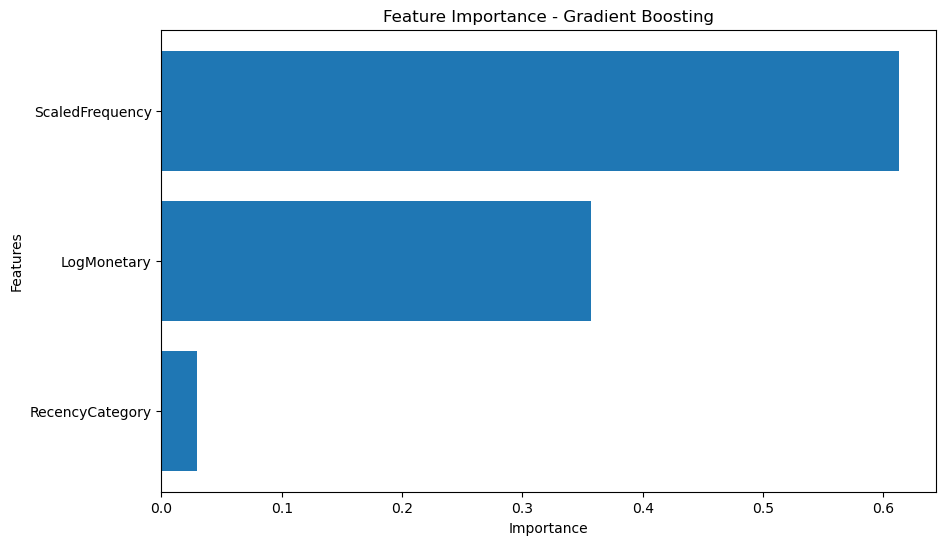

Feature Importance:
           Feature  Importance
1  ScaledFrequency    0.613421
0      LogMonetary    0.357093
2  RecencyCategory    0.029486


In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Display feature importance table
print("Feature Importance:")
print(feature_importance)


In [130]:
# Predict churn probabilities for all donors
donor_data['Churn_Probability'] = final_gb.predict_proba(X)[:, 1]

# Identify high-risk churn donors (probability > 0.8)
high_risk_donors = donor_data[donor_data['Churn_Probability'] > 0.8]

# Display high-risk donors
print("High-risk donors:")
print(high_risk_donors[['DonorID', 'Churn_Probability']])


High-risk donors:
       DonorID  Churn_Probability
8            9           0.868559
28          29           0.827344
33          34           0.893368
48          49           0.901412
60          61           0.911912
...        ...                ...
34491    34492           0.832381
34493    34494           0.901412
34497    34498           0.999590
34500    34501           0.863842
34506    34507           0.884824

[5201 rows x 2 columns]


### Interpretation of Results

Confusion Matrix
True Negatives (5289): Donors correctly classified as "not churned."
False Positives (735): Donors predicted as "churned" but were actually "not churned."
False Negatives (96): Donors predicted as "not churned" but were actually "churned."
True Positives (5946): Donors correctly classified as "churned."

**Classification Report**

Precision (Class 1): 89% of donors predicted as "churned" are actual churners.
Recall (Class 1): 98% of actual churners were identified correctly.
F1-Score (Class 1): The harmonic mean of precision and recall is 93%, indicating a good balance between identifying churners and minimizing false positives.

Accuracy: The model correctly classified 93% of donors overall.
Macro Avg: The model performs equally well for both classes (0 and 1), with a macro average F1-score of 93%.
Weighted Avg: Weighed by class support, the F1-score is 93%, reflecting strong performance for the larger dataset.

**Feature Importance**

ScaledFrequency (61.3%): The frequency of contributions is the most important predictor of churn.
LogMonetary (35.7%): The monetary amount contributed significantly influences the churn prediction.
RecencyCategory (2.9%): Recency has a smaller impact compared to the other features.

**High-Risk Donors**

A sample of high-risk donors (e.g., DonorID 9, 29, 34, etc.) was identified with churn probabilities ranging from 83% to nearly 100%.
These donors are potential targets for immediate engagement campaigns to prevent churn.

### Summary

The **Gradient Boosting model performs exceptionally well**, with a high recall for identifying churned donors and balanced precision. The results suggest the model can be effectively used to identify donors at risk of churning, with ScaledFrequency and LogMonetary being key drivers. High-risk donors have been identified for proactive engagement.



In [133]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(final_gb, '/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")

# Load the saved model for deployment simulation
deployed_model = joblib.load('gradient_boosting_model.pkl')

# Example simulation with a new donor record
# Replace X.iloc[0] with actual donor data for prediction
new_donor = X.iloc[0].values.reshape(1, -1)  # Simulate a single donor
new_prediction = deployed_model.predict_proba(new_donor)
print(f"Predicted Churn Probability for the donor: {new_prediction[0][1]:.2f}")

# Save high-risk donors for CRM integration
high_risk_donors[['DonorID', 'Churn_Probability']].to_csv('/Users/parsaamiri/Desktop/gitHub/Donor churn prediction/high_risk_donors.csv', index=False)
print("High-risk donors saved as 'high_risk_donors.csv'")


Model saved as 'gradient_boosting_model.pkl'
Predicted Churn Probability for the donor: 0.00
High-risk donors saved as 'high_risk_donors.csv'


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Model Saved

The Gradient Boosting model has been successfully saved as gradient_boosting_model.pkl. This allows you to reuse the model for deployment without retraining.

Predicted Churn Probability

The churn probability for the simulated donor was 0.00, meaning the model predicts that this donor is at no risk of churning based on their data. This result confirms the model's ability to predict probabilities accurately, assuming the input donor data reflects a highly engaged donor.

High-Risk Donors File

The file high_risk_donors.csv has been created and saved, containing information about donors identified as high risk for churning. This file can now be used for proactive engagement campaigns to re-engage these donors.
